In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt
import simpleaudio

import fft_funcs

In [2]:
piano = wavfile.read("music1.wav")
recorder = wavfile.read("music2.wav")
print("Sample rates (Hz):")
print("Piano: {}".format(piano[0]))
print("Recorder: {}".format(piano[0], recorder[0]))
Fs = piano[0]
piano = piano[1]
recorder = recorder[1]

t_piano_max = piano.size*(1.0/Fs)
t_recorder_max = recorder.size*(1.0/Fs)
t_piano = np.linspace(0, t_piano_max, piano.size)
t_recorder = np.linspace(0, t_recorder_max, recorder.size)

Sample rates (Hz):
Piano: 44100
Recorder: 44100


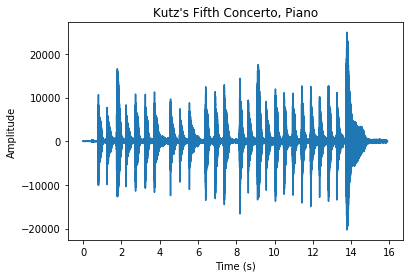

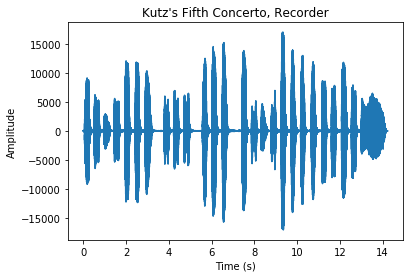

In [3]:
plt.figure()
plt.title("Kutz's Fifth Concerto, Piano")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_piano, piano)

plt.figure()
plt.title("Kutz's Fifth Concerto, Recorder")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_recorder, recorder)

plt.show()

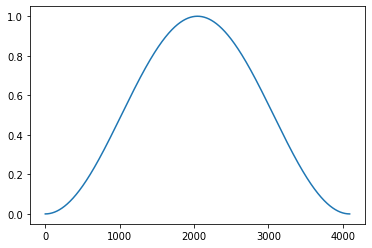

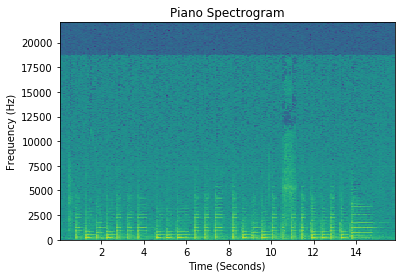

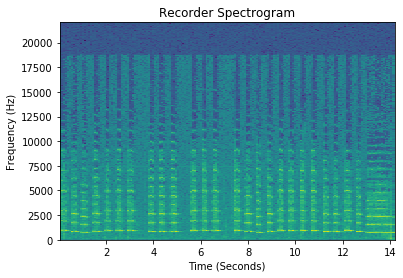

In [4]:
# This will be coarsely tuned, but we'll start with a totally non-rigorous bet of 4096 samples
# (or 4096 samples * (1 second/44100 samples) ~= 9ms)
nperseg = 4096
noverlap = nperseg // 8
# Barring a good spec for considerations like selectivity,
# side-lobe height, or side lob attenuation, I'm going to pick
# the Hann(ing) Window for my spectrogram
window = np.hanning(nperseg)
plt.figure()
plt.plot(window)

title = "Piano Spectrogram"
fft_funcs.plot_spectrogram(piano, fs=Fs, window=window, normed="log",
                           nperseg=nperseg, noverlap=noverlap, title=title)
title = "Recorder Spectrogram"
fft_funcs.plot_spectrogram(recorder, fs=Fs, window=window, normed="log",
                           nperseg=nperseg, noverlap=noverlap,
                           title=title)

In [5]:
# Let's create and apply a filter
# Butterworth: simple, flat passband, bessel is preferred for group delay
# but we're using filtfilt to get linear phase.
# 4th order just cuz
# lowpass to remove overtones. highpass to clean up subharmonic crud
b,a = sig.butter(4, [200, 400], btype="band", analog=False, fs=Fs)
piano_filtered = sig.filtfilt(b, a, piano)
b,a = sig.butter(4, [750, 1250], btype="band", analog=False, fs=Fs)
recorder_filtered = sig.filtfilt(b, a, recorder)

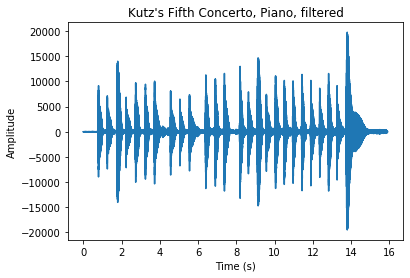

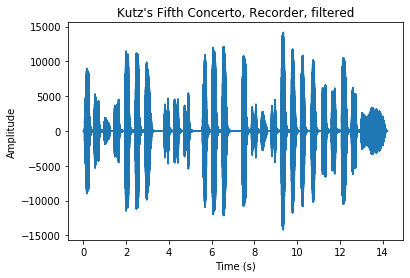

In [6]:
plt.figure()
plt.title("Kutz's Fifth Concerto, Piano, filtered")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_piano, piano_filtered)

plt.figure()
plt.title("Kutz's Fifth Concerto, Recorder, filtered")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_recorder, recorder_filtered)

plt.show()

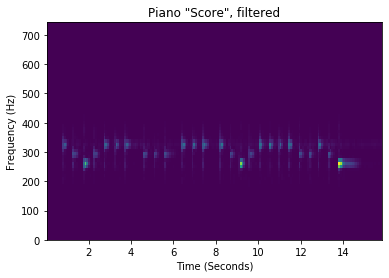

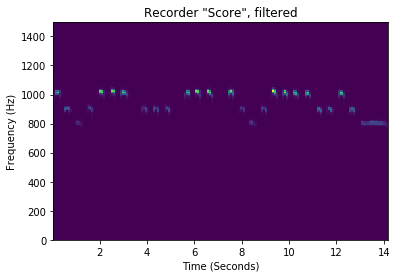

In [7]:
title = "Piano \"Score\", filtered"
fft_funcs.plot_spectrogram(piano_filtered, fs=Fs, window=window, normed="norm", maxfreq=750,
                           nperseg=nperseg, noverlap=noverlap, title=title)
title = "Recorder \"Score\", filtered"
fft_funcs.plot_spectrogram(recorder_filtered, fs=Fs, window=window, normed="norm", maxfreq=1500,
                           nperseg=nperseg, noverlap=noverlap, title=title)

In [8]:
# Get a vector of the maximum frequency bin for each slice
freqs_p, t_p, Sxx_p = fft_funcs.spectrogram(piano_filtered, fs=Fs, window=window, nperseg=nperseg, noverlap=noverlap)
freqs_r, t_r, Sxx_r = fft_funcs.spectrogram(recorder_filtered, fs=Fs, window=window, nperseg=nperseg, noverlap=noverlap)

(2049, 195)
93
1001.2939453125


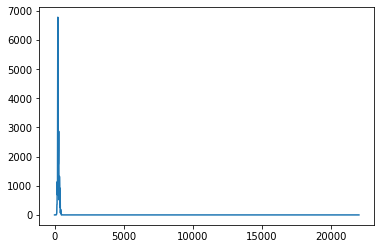

In [9]:
print(Sxx_p.shape)
plt.figure()
plt.plot(freqs_p, Sxx_p.T[0])
print(Sxx_r.T[0].argmax())
print(freqs_r[Sxx_r.T[0].argmax()])

In [10]:
Sxx_p.T[0].shape

(2049,)